### LGM Internship June 2023

## Author - Kavya V

### Beginner Level Task

### Task 1 - Iris Flower Classification ML Project

### Step 1 - Import Necessary libraries

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import sklearn.datasets as datasets
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Step 2 - Load Dataset to Python Environment

In [2]:
data = pd.read_csv('iris_data.csv')
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [3]:
# Giving proper headings to columns
data_header = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Species']
data.to_csv('Iris.csv',header = data_header, index = False)
df = pd.read_csv('Iris.csv')
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


### Step 3 - Exploratory Data Analysis

In [4]:
df.shape

(149, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  149 non-null    float64
 1   Sepal_Width   149 non-null    float64
 2   Petal_Length  149 non-null    float64
 3   Petal_Width   149 non-null    float64
 4   Species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.dtypes

Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Species          object
dtype: object

In [8]:
df.isnull().sum()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Species         0
dtype: int64

There are no missing values in the dataset.

In [9]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: Species, dtype: int64

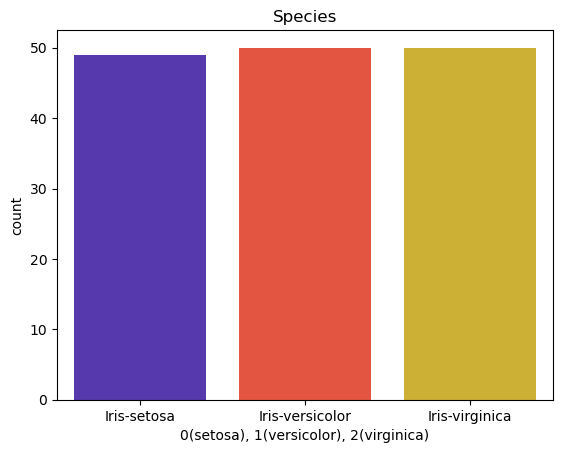

In [10]:
sns.countplot(x='Species',data=df, palette='CMRmap')
plt.title("Species")
plt.xlabel('0(setosa), 1(versicolor), 2(virginica)')
plt.show() 

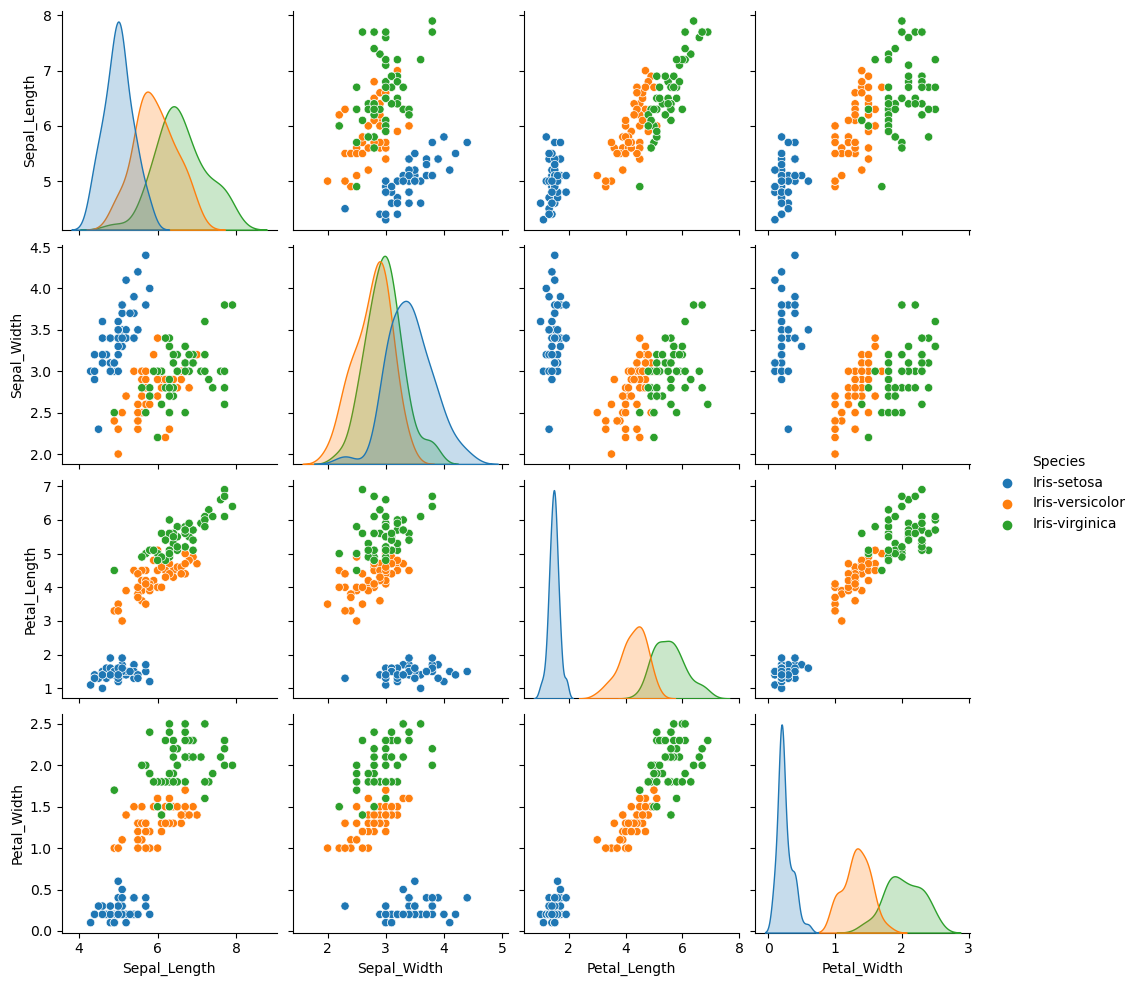

In [11]:
sns.pairplot(df,hue='Species')
plt.show()

### Step 4 - Preparing the Data

In [12]:
# Split data into features and target
y = df['Species']
x = df.drop('Species',axis = 1)

In [13]:
#Splitting data into training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42) 

In [14]:
x_train.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
22,5.1,3.3,1.7,0.5
15,5.4,3.9,1.3,0.4
65,5.6,3.0,4.5,1.5
11,4.8,3.0,1.4,0.1
42,5.0,3.5,1.6,0.6


In [15]:
x_test.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
73,6.4,2.9,4.3,1.3
18,5.1,3.8,1.5,0.3
117,7.7,2.6,6.9,2.3
78,5.7,2.6,3.5,1.0
76,6.7,3.0,5.0,1.7


In [16]:
y_train.head()

22        Iris-setosa
15        Iris-setosa
65    Iris-versicolor
11        Iris-setosa
42        Iris-setosa
Name: Species, dtype: object

In [17]:
y_test.head()

73     Iris-versicolor
18         Iris-setosa
117     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
Name: Species, dtype: object

### Step 5 - Model Building

### Logistic Regression

In [18]:
lr = LogisticRegression()
model_lr = lr.fit(x_train,y_train)
ypred_lr = model_lr.predict(x_test)
print(classification_report(y_test,ypred_lr))
print('Accuracy score is:',accuracy_score(y_test,ypred_lr))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.67      0.80         9
 Iris-virginica       0.79      1.00      0.88        11

       accuracy                           0.90        30
      macro avg       0.93      0.89      0.89        30
   weighted avg       0.92      0.90      0.90        30

Accuracy score is: 0.9


### Step 6 - Predicting the class output for some random values of petal and sepal length and width

In [32]:
# Estimating class probabilities
print("Estimating Class Probabilities for flower whose petals length width are 4.7cm and 3.2cm and sepal length and width are 1.3cm and 0.2cm. ")
print('Output = ', model_lr.predict([[4.7, 3.2, 1.3, 0.2]]))
print("Our model predicts the class as Iris-setosa")

Estimating Class Probabilities for flower whose petals length width are 4.7cm and 3.2cm and sepal length and width are 1.3cm and 0.2cm. 
Output =  ['Iris-setosa']
Our model predicts the class as Iris-setosa
